Clasificación - Distribuidores mayoristas en Portugal
===

**Diana Cardona Hernández**    
dcardonah@unal.edu.co   
Universidad Nacional de Colombia, Sede Medellín  


---

# Definición del problema real

Un distribuidor mayorista del mercado portugués desea determinar en que canal de distribucion debe enfocar su oferta, sabiendo que este cuenta con cierta cantidad de mercancia disponible clasificada por categorias de productos (frescos, lacteos, comestibles, etc), es decir, con respecto al historico de los datos su venta debe estar orientada a los "Horeca" (Hoteles/Restaurantes/Cafes) -distribuidores retail- o debe dirigirse a los distribuidores minoristas.



# Definición del problema en términos de los datos

Se tiene una muestra de 440 compras de clientes de un distribuidor mayorista en unidades monetarias, cada resgistro contiene 8 variables de las cuales 6 son numericas y 2 nominales.

Las variables que describen cada uno de los registros en la base son las siguientes:

1. **CanalDistribucion**: canal de clientes - Horeca (Hotel / Restaurante / Café) o canal minorista (Nominal).
2. **Region**: Región de clientes - Lisboa, Oporto u Otra (Nominal). *Para efectos del problema no se tendrá en cuenta*
3. **Frescos**: gasto anual (m.u.) en productos frescos (Continuo).
4. **Lacteos**: gasto anual (m.u.) en productos lácteos (Continuo).
5. **Comestibles**: gasto anual (m.u.) en productos de abarrotes (Continuo).
6. **Congelados**: gasto anual (m.u.) en productos congelados (Continuo).
7. **DetergentesyPapel**: gasto anual (m.u.) en detergentes y productos de papel (continuo).
8. **Delicatessen**: gasto anual (m.u.) en y productos delicatessen (Continuo);

Para efectos del problema  la variable **Region** es asignada de la siguiente manera, 1: Lisboa, 2: Oporto, 3: Otra. 
Similarmente, la variable **CanalDistribucion** es asignada 1: Horeca, 2: Canal Minorista.

En términos de los datos, se desea poder determinar a que clientes (discriminados estos por su canal de distribución **Horeca** o **Canal Minorista**) se debería ofrecer los servicios prestados, es decir, a que clientes deberían vender sus productos.  

Variable de salida: CanalDistribucion  

Fuente de los datos: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

# Exploración de los datos

## Carga de datos

In [2]:
#Cargar los datos 
datos <- read.csv("Wholesale.csv", stringsAsFactors = TRUE)
datos <- datos[-2] #Se elimina la variable Region ya que esta no será tenida en cuenta 
#Descripción del Data Set
str(datos)

'data.frame':	440 obs. of  7 variables:
 $ CanalDistribucion: int  2 2 2 1 2 2 2 2 1 2 ...
 $ Frescos          : int  12669 7057 6353 13265 22615 9413 12126 7579 5963 6006 ...
 $ Lacteos          : int  9656 9810 8808 1196 5410 8259 3199 4956 3648 11093 ...
 $ Comestibles      : int  7561 9568 7684 4221 7198 5126 6975 9426 6192 18881 ...
 $ Congelados       : int  214 1762 2405 6404 3915 666 480 1669 425 1159 ...
 $ DetergentesyPapel: int  2674 3293 3516 507 1777 1795 3140 3321 1716 7425 ...
 $ Delicatessen     : int  1338 1776 7844 1788 5185 1451 545 2566 750 2098 ...


A continuación se convierte la variable **CanalDistribucion** (numérica) a categorica, puesto que esta será la variable de la cual dependerá la clasificación, es decir, nuestra variable de interés

In [3]:
# Se convierte la columna CanalDistribucion de integer a factor.
datos$CanalDistribucion <- 
  factor(datos$CanalDistribucion, 
         levels = c(1, 2),              # los números 1, 2 se convierten en factores
         labels = c("Horeca", "Canal Minorista")) # se dan nuevos nombres a los factores

#Esta es nuestra variable de interés
table(datos$CanalDistribucion)


         Horeca Canal Minorista 
            298             142 

En la tabla de arriba se puede ver que la cantidad de observaciones en cada caso no es alarmantemente diferente, por 
ello no es necesario realizar algún tipo de procedimiento extra para la partición de los datos (por ejemplo, estratificación).

In [11]:
# Se convierte el conteo en probabilidades.
round(prop.table(table(datos$CanalDistribucion)) * 100, digits = 1)


         Horeca Canal Minorista 
           67.7            32.3 

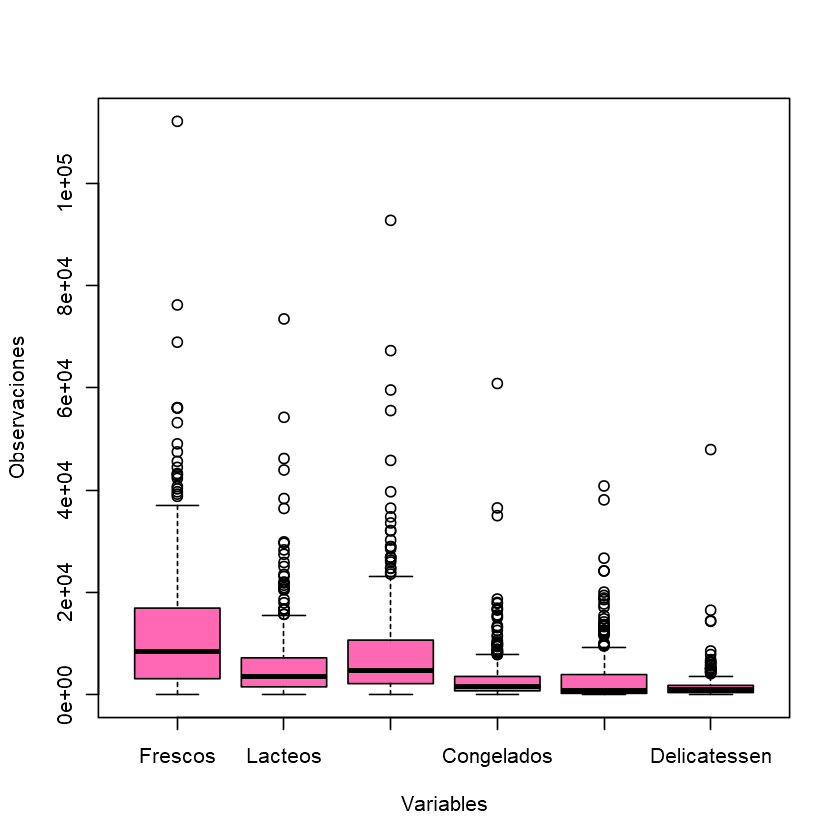

In [12]:
#Mediante un diagrama de cajas se puede ver cuales son las variables que tienen mayor variabilidad y asi buscar como se 
#pueden estandarizar
boxplot(datos[,-1], col='hotpink', ylab ='Observaciones', xlab='Variables')

En la gráfica anterior se evidencia claramente que hay unas variables con una dispersión mayor a otras (tienen diferentes ranogs), por lo tanto algunas de ellas tendrán un peso superior a la hora de hallar cualquier métrica. 

Esto se da debido a que las variables se encuentran en diferente escala, a continuación se realiza la normalización (aplicando la transformación basada en Min-Max) para dejar todas las variables en una misma escala.

In [4]:
#Se define la función para la normalización y se aplica al conjunto de datos
normalize <- 
function(x) {
    return ((x - min(x)) / (max(x) - min(x)))
}

#Aplicación a los datos
datos_norm <- as.data.frame(lapply(datos[,-1], normalize))
head(datos_norm)

Frescos,Lacteos,Comestibles,Congelados,DetergentesyPapel,Delicatessen
0.11294004,0.13072723,0.08146416,0.003106305,0.06542720,0.02784731
0.06289903,0.13282409,0.10309667,0.028548419,0.08058985,0.03698373
0.05662161,0.11918086,0.08278992,0.039116429,0.08605232,0.16355861
0.11825445,0.01553586,0.04546385,0.104841891,0.01234568,0.03723404
0.20162642,0.07291369,0.07755155,0.063933995,0.04345483,0.10809345
0.08390698,0.11170568,0.05521843,0.010535139,0.04389575,0.03020442


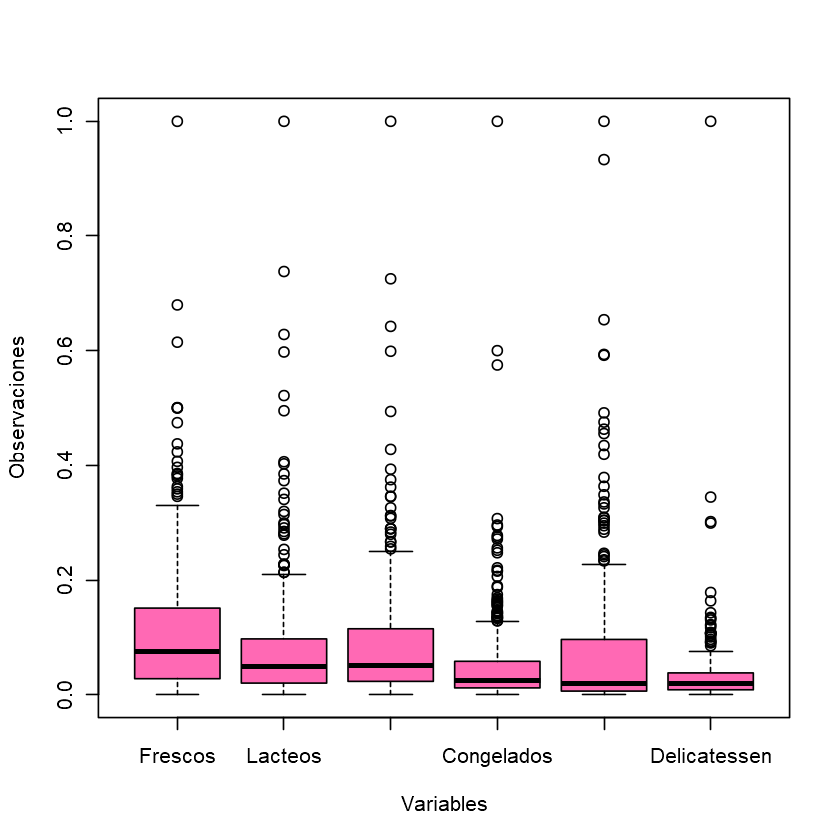

In [14]:
#Visualizar y verificar con un boxplot que las variables hayan sido transformadas
boxplot(datos_norm, col='hotpink', ylab ='Observaciones', xlab='Variables')

Se puede notar que ahora los datos se ven en la misma escala (notar cambio en el eje y), con una dispersión similar y casi todas las cajas se traslapan.

### Partición de los datos
Se realizará la partición de los datos en esta sección, para luego llamar la necesaria en cada metodología; Se tendrán en cuenta el 70 % de los datos para el entrenamiento del modelo y el otro 30% para el test (partición estratificada).

In [6]:
#install.packages('caret', dependencies =TRUE)
library(caret)
library(lattice)
library(ggplot2)

set.seed(300)
train.index <- createDataPartition(datos$CanalDistribucion, p = .7, list = FALSE) #Validación cruzada, partición estratificada

#Conjuntos de datos unicamente para entrenamiento
datos_train <- datos[train.index,-1] #Datos sin estandarizar y sin la columna de la variable de salida
datos_train_norm<- datos_norm[train.index,-1] #Datos estandarizados y sin la columna de la variable de salida
datos_train_labels <- datos[train.index,1] #Unicamente las variables de salida 

#Conjuntos de datos unicamente para predicción
datos_test <- datos[-train.index,-1]
datos_test_norm <- datos_norm[-train.index,-1]
datos_test_labels <- datos[-train.index,1]

#Datos de entrenamiento y predicción completos (labels y predictores)
datos_train_todo <-datos[-train.index,]
datos_test_todo <- datos[-train.index,]

# Modelos a evaluar

* Vecinos más cercanos: k-NN
* Árboles de decisión: C50
* Bosques: Random Forest
* Bossting: XG Boost

# Metodología k-NN
## Modelo 1

Esta metodología permite asignar una clase, de $P$ posibles a un nuevo registro, determinando inicialmente los $k$ registros más cercanos (mediante juicios de expertos o metodologias que lo permitan) en terminos de distancia a ese nuevo registro, asignando asi la clase al nuevo punto por mayoria, es decir, asigna la clase con mayor frecuencia entre los $k$ vecinos más cercanos.  

Se debe tener en cuenta la estandarización de las variables, ya que este modelo no es robusto ante puntos atípicos.  

En este caso, se asignará la case **Horeca** o **Canal Minorista** al nuevo punto ingresado, según las clases a las cuales sus vecinos mas cercanos (aquellos con menor distancia) pertenecen.


## Creación del Modelo 
### Estimación hiperparámetros

In [30]:
modelLookup('knn')

model,parameter,label,forReg,forClass,probModel
knn,k,#Neighbors,TRUE,TRUE,TRUE


A continuación se estimara el parámetro necesario para el modelo, es decir, el valor óptimo de k (se tomará para este ejemplo k de 1 a 22, es decir el 5% de los datos)

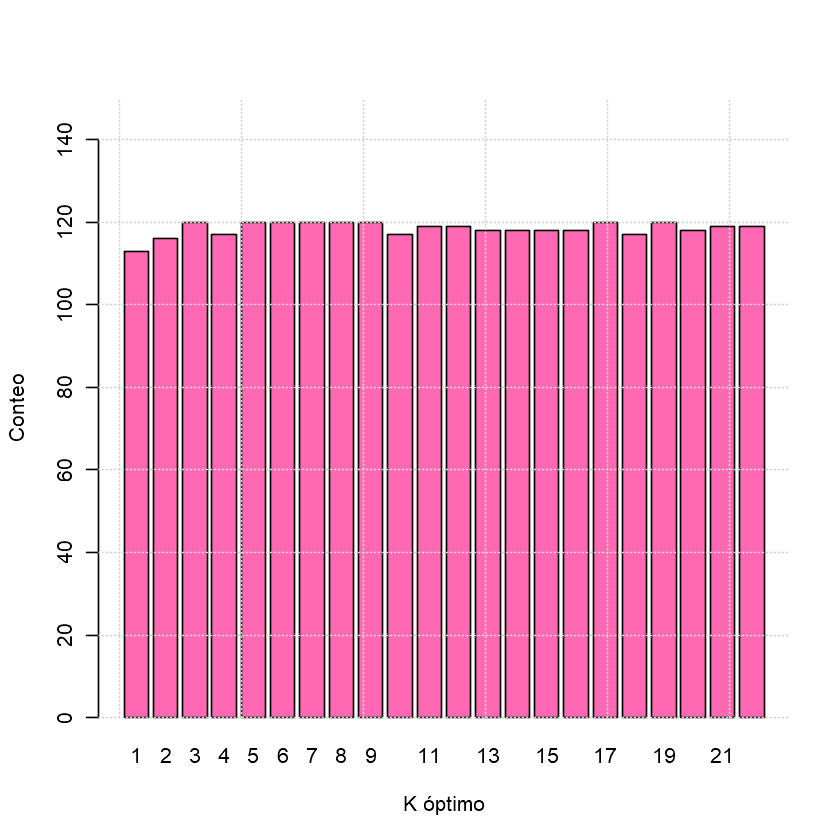

In [34]:

#install.packages("class", dependencies= TRUE)
library(class)
y = rep(0,22)
for(k in 1:22)
{ datos_test_pred <- knn(train = datos_train_norm,     # conjunto de entrenamiento
                      test = datos_test_norm,       # conjutno de prueba
                      cl = datos_train_labels, # clases para el conjunto de entrenamiento
                      k = k)   
  y[k] = sum(datos_test_pred == datos_test_labels)
}
barplot(y, xlab="K óptimo", ylab="Conteo", col = 'hotpink', ylim=c(0,150), names.arg=c(1:22))
grid()

 Existen otras técnicas para hallar ese "k-óptimo" entre ellas esta el bootstraping usando métricas de error Accuracy y Kappa, con el cual obtendremos otro valor de k y se realizará la comparación

In [9]:
## K óptimo usando CARET 
#install.packages('e1071')

library(irr)
library(class)
library(caret)
library(lpSolve)

datos_norm$CanalDistribucion <- datos$CanalDistribucion

set.seed(300)

grid <- expand.grid(.k = 1:22)
model <- train(CanalDistribucion ~ .,
           data = datos_norm,
           method = "knn",
           tuneGrid = grid)
model

k-Nearest Neighbors 

440 samples
  6 predictor
  2 classes: 'Horeca', 'Canal Minorista' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 440, 440, 440, 440, 440, 440, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.8723314  0.7099103
   2  0.8711177  0.7059991
   3  0.8797759  0.7265718
   4  0.8770102  0.7205096
   5  0.8863472  0.7420141
   6  0.8901691  0.7504790
   7  0.8933566  0.7578242
   8  0.9000074  0.7722042
   9  0.9017167  0.7768569
  10  0.9035282  0.7809013
  11  0.9057769  0.7857041
  12  0.9070957  0.7886979
  13  0.9041215  0.7819697
  14  0.9070999  0.7887519
  15  0.9063570  0.7868374
  16  0.9065617  0.7868475
  17  0.9078156  0.7899850
  18  0.9088125  0.7927240
  19  0.9085319  0.7917088
  20  0.9077724  0.7899943
  21  0.9087508  0.7917049
  22  0.9088001  0.7925727

Accuracy was used to select the optimal model using  the largest value.
The final value used for the model was k = 18.

In [10]:
#Matriz de confusión k=18 (obtenido por CARET)
datos_test_pred <- knn(train = datos_train, test = datos_test, cl = datos_train_labels, k = 18)
table(datos_test_labels, datos_test_pred)

                 datos_test_pred
datos_test_labels Horeca Canal Minorista
  Horeca              81               8
  Canal Minorista      8              34

In [35]:
#Datos que serán pronosticados (clasificados), se usará k = 3 debido a que fue el k "más" óptimo, es decir, una de las 
#barras más altas y por lo tanto se escoge por parsimonia el k menor 

datos_test_pred <- knn(train = datos_train,     # conjunto de entrenamiento
                      test = datos_test,       # conjutno de prueba
                      cl = datos_train_labels, # clases para el conjunto de entrenamiento
                      k = 3) 

confusionMatrix(datos_test_labels, datos_test_pred)

Confusion Matrix and Statistics

                 Reference
Prediction        Horeca Canal Minorista
  Horeca              81               8
  Canal Minorista      7              35
                                          
               Accuracy : 0.8855          
                 95% CI : (0.8182, 0.9345)
    No Information Rate : 0.6718          
    P-Value [Acc > NIR] : 1.284e-08       
                                          
                  Kappa : 0.7388          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9205          
            Specificity : 0.8140          
         Pos Pred Value : 0.9101          
         Neg Pred Value : 0.8333          
             Prevalence : 0.6718          
         Detection Rate : 0.6183          
   Detection Prevalence : 0.6794          
      Balanced Accuracy : 0.8672          
                                          
       'Positive' Class : Horeca          


La tabla indica que se calcularon correctamente 116 patrones (81+35) y que 8 canales minoristas se clasificaron como Horeca y 7 Horecas como canales minoristas. 

### Nota:
Utilizando la librería Caret, el k óptimo resultante es de 18, pero al hacer la respectiva matriz de confusión nos damos cuenta que esta es similar a la de un k=3 (obtenido anteriormente), incluso un poco mas deficiente, por lo tanto, por parsimonia del modelo se utiliza el de menor valor (k=3).

# Metodología Arboles de Decisión (C50)
## Modelo 2

Un arbol de decisión es un clasificador -en forma de arbol- tal que en cada nodo se prueban las características (features),
hay una rama por cada característica probada y las hojas simbolizan las categorías. Una de las mayores ventajas de este 
método es que permite construir reglas a partir de un conjunto de datos para ordenarlo.  

En otras palabras, La metodología de árboles de decisión se basa en la partición del espacio de entrada (las variables o características medibles) en regiones buscando separar en cada región un grupo de elementos que pertenecen a una clase particular

In [38]:
## Se verifica la proporción entre los canales minoristas y los horeca en los dos conjuntos de datos

## Conjunto de entrenamiento
prop.table(table(datos_train_labels))

## Conjunto de prueba
prop.table(table(datos_test_labels))

datos_train_labels
         Horeca Canal Minorista 
      0.6763754       0.3236246 

datos_test_labels
         Horeca Canal Minorista 
      0.6793893       0.3206107 

### Estimación de parámetros

In [39]:
modelLookup('C5.0')

model,parameter,label,forReg,forClass,probModel
C5.0,trials,# Boosting Iterations,FALSE,TRUE,TRUE
C5.0,model,Model Type,FALSE,TRUE,TRUE
C5.0,winnow,Winnow,FALSE,TRUE,TRUE


Es claro que se vuelve necesario estimar la cantidad de clasificadores óptima para los datos que se obtienen, es decir, estimar el valor de trials, para ello se realiza validación cruzada y así, con la medida de error que se obtenga se tomará la mejor decisión, como la cantidad de observaciones en esta ocasión es pequeña (440), se probará únicamente con 1 arbol y con 5 arboles.

In [42]:
## Carga la librería
#install.packages("C50")
library(C50)
library(caret)
library(mlbench)

traincontrol <- trainControl(method = "repeatedcv",
  number = 10,
  repeats = 10, returnResamp="all")

grid <- expand.grid(.winnow = c(1,2), .trials=c(1,5), .model="tree" )
tree <- train(x=datos_train,y=datos_train_labels,tuneGrid=grid,trControl=traincontrol,method="C5.0",verbose=FALSE)
tree


C5.0 

309 samples
  6 predictor
  2 classes: 'Horeca', 'Canal Minorista' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 278, 278, 278, 278, 278, 278, ... 
Resampling results across tuning parameters:

  winnow  trials  Accuracy   Kappa    
  1       1       0.8970860  0.7717416
  1       5       0.8913011  0.7518027
  2       1       0.8970860  0.7717416
  2       5       0.8913011  0.7518027

Tuning parameter 'model' was held constant at a value of tree
Accuracy was used to select the optimal model using  the largest value.
The final values used for the model were trials = 1, model = tree and winnow
 = 1.

In [43]:
tree <- C5.0(datos_train, datos_train_labels, trials=1)
pred_tree <- predict(tree, datos_test)
table(pred_tree)

pred_tree
         Horeca Canal Minorista 
             85              46 

In [44]:
confusionMatrix(pred_tree, datos_test_labels)

Confusion Matrix and Statistics

                 Reference
Prediction        Horeca Canal Minorista
  Horeca              83               2
  Canal Minorista      6              40
                                          
               Accuracy : 0.9389          
                 95% CI : (0.8832, 0.9733)
    No Information Rate : 0.6794          
    P-Value [Acc > NIR] : 4.999e-13       
                                          
                  Kappa : 0.8633          
 Mcnemar's Test P-Value : 0.2888          
                                          
            Sensitivity : 0.9326          
            Specificity : 0.9524          
         Pos Pred Value : 0.9765          
         Neg Pred Value : 0.8696          
             Prevalence : 0.6794          
         Detection Rate : 0.6336          
   Detection Prevalence : 0.6489          
      Balanced Accuracy : 0.9425          
                                          
       'Positive' Class : Horeca          


La tabla indica que se calcularon correctamente 123 patrones (83+40) y que 2 canales minoristas se clasificaron como Horeca y 6 Horecas como canales minoristas. 

# Metodología Random Forest
## Modelo 3

Un Random Forest es una combinación de árboles predictores tal que cada árbol depende de los valores de un vector aleatorio probado independientemente y con la misma distribución para cada uno de estos; Esta es una técnica  que mejora la precisión en la clasificación mediante la incorporación de aleatoriedad en la construcción de cada clasificador individual.

### Estimación de parámetros

In [34]:
library('caret')
modelLookup('rf')

model,parameter,label,forReg,forClass,probModel
rf,mtry,#Randomly Selected Predictors,TRUE,TRUE,TRUE


Debido a que el modelo tiene un único hiperparametro (mtry), se realiza una validación cruzada para ser estimado a traves del error de ajuste probando con los valores del 1 al 6, de la siguiente manera: 

Random Forest 

131 samples
  6 predictor
  2 classes: 'Horeca', 'Canal Minorista' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 118, 118, 118, 118, 118, 119, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  1     0.9109585  0.7908980
  2     0.9160867  0.8033494
  3     0.9261600  0.8270062
  4     0.9235958  0.8265199
  5     0.9261600  0.8294837
  6     0.9184676  0.8107758

Accuracy was used to select the optimal model using  the largest value.
The final value used for the model was mtry = 3.


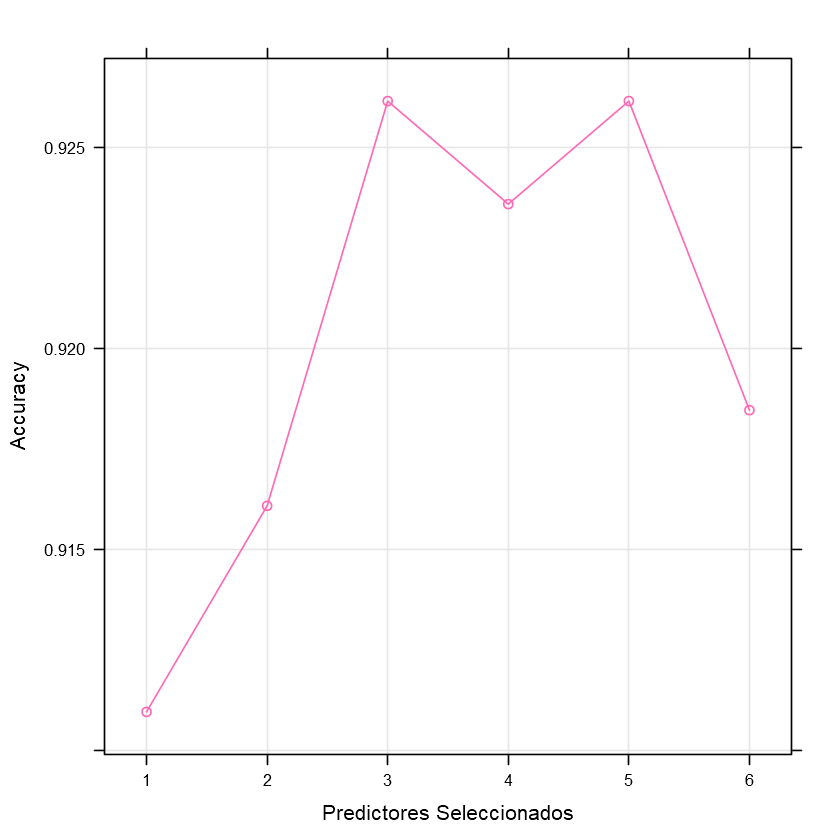

In [47]:
#install.packages('randomForest', dependencies = TRUE)
library(randomForest)

train.control <- trainControl(method = "repeatedcv", number = 10, repeats = 3, search = "grid")

set.seed(300)
tunegrid <- expand.grid(.mtry=c(1:6)) #Le damos la cantidad que queremos que nos pruebe
metric <- "Accuracy"

rf_gridtree <- train(CanalDistribucion ~ ., data = datos_train_todo, method = 'rf', metric=metric, tuneGrid=tunegrid, trControl=train.control)
print(rf_gridtree)
plot(rf_gridtree, xlab = 'Predictores Seleccionados', ylab = 'Accuracy', col = 'hotpink')

El random forest se apropia de ese parametro estimado mtry = 3 para la creación como tal del modelo

In [48]:
trellis.par.set(caretTheme())
#ggplot(rf_tree)

#Predicting test data
rf_tree_pred <- predict(rf_gridtree, datos_test_todo)

#Confusion matrix
confusionMatrix(rf_tree_pred, datos_test_labels)

Confusion Matrix and Statistics

                 Reference
Prediction        Horeca Canal Minorista
  Horeca              89               0
  Canal Minorista      0              42
                                     
               Accuracy : 1          
                 95% CI : (0.9722, 1)
    No Information Rate : 0.6794     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.6794     
         Detection Rate : 0.6794     
   Detection Prevalence : 0.6794     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : Horeca     
                                     

# Metodología  Boosting
## Modelo 4

Esta técnica se fundamenta en implementar diferentes clasificadores (débiles) y así, por mayoría de votación se escoge la clásificación "óptima" de una nueva observación. Estos clasificadores se seleccionan por validación cruzada o por el modelador.

## XG Boost

### Estimación de parámetros

In [49]:
modelLookup('xgbTree')

model,parameter,label,forReg,forClass,probModel
xgbTree,nrounds,# Boosting Iterations,TRUE,TRUE,TRUE
xgbTree,max_depth,Max Tree Depth,TRUE,TRUE,TRUE
xgbTree,eta,Shrinkage,TRUE,TRUE,TRUE
xgbTree,gamma,Minimum Loss Reduction,TRUE,TRUE,TRUE
xgbTree,colsample_bytree,Subsample Ratio of Columns,TRUE,TRUE,TRUE
xgbTree,min_child_weight,Minimum Sum of Instance Weight,TRUE,TRUE,TRUE
xgbTree,subsample,Subsample Percentage,TRUE,TRUE,TRUE


In [42]:
library(xgboost)
train.control <- trainControl(method = "repeatedcv",
                              number = 10,
                              repeats = 1,
                              search = "grid")

tune.grid <- expand.grid(eta = c(0.05, 0.075, 0.1),
                         nrounds = c(50, 75, 100),
                         max_depth = 6:8,
                         min_child_weight = c(2.0, 2.25, 2.5),
                         colsample_bytree = c(0.3, 0.4, 0.5),
                         gamma = 0,
                         subsample = 1)

set.seed(300)
xgbTree <- train(CanalDistribucion~ ., data = datos_train_todo, method = 'xgbTree',
                 tuneGrid=tune.grid, trControl=train.control)
xgbTree

eXtreme Gradient Boosting 

131 samples
  6 predictor
  2 classes: 'Horeca', 'Canal Minorista' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 118, 118, 118, 118, 118, 119, ... 
Resampling results across tuning parameters:

  eta    max_depth  colsample_bytree  min_child_weight  nrounds  Accuracy 
  0.050  6          0.3               2.00               50      0.8833333
  0.050  6          0.3               2.00               75      0.8910256
  0.050  6          0.3               2.00              100      0.8910256
  0.050  6          0.3               2.25               50      0.9076923
  0.050  6          0.3               2.25               75      0.9153846
  0.050  6          0.3               2.25              100      0.9064103
  0.050  6          0.3               2.50               50      0.8910256
  0.050  6          0.3               2.50               75      0.9147436
  0.050  6          0.3               2.50     

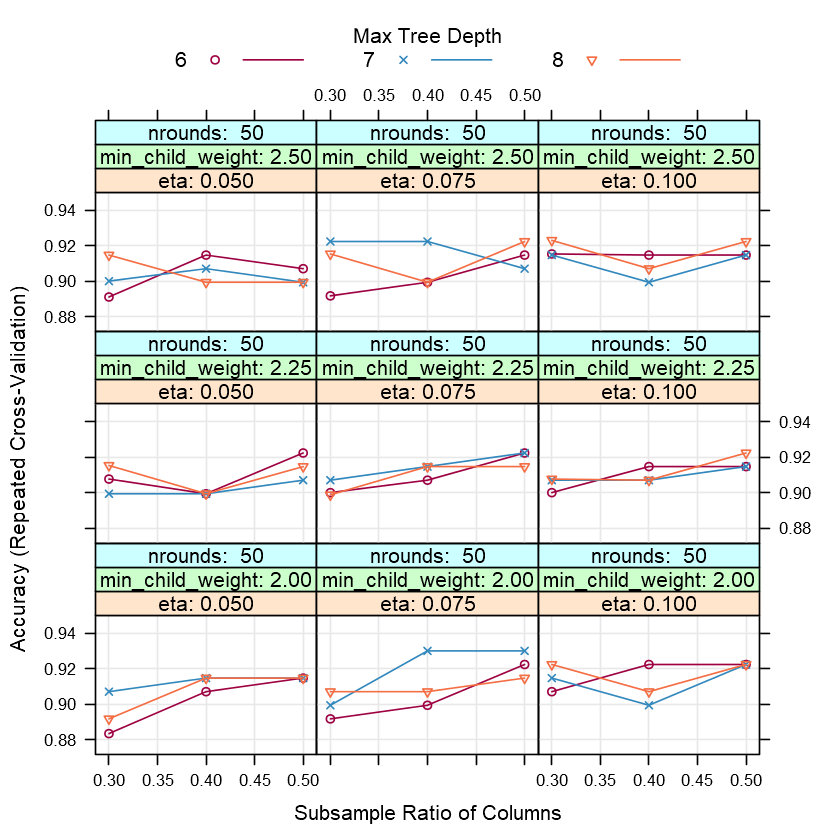

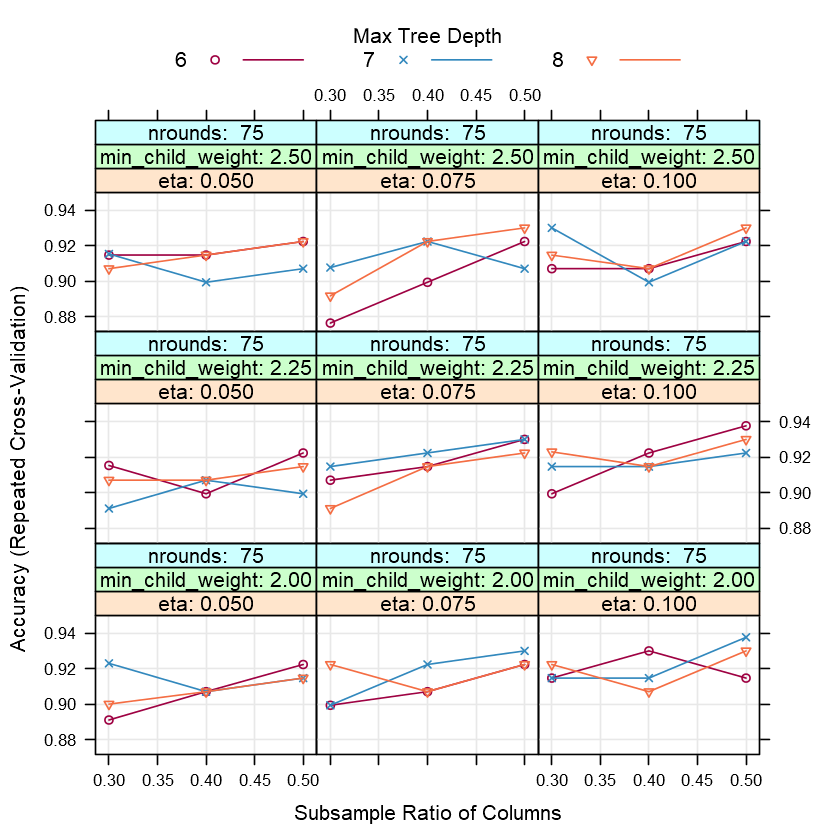

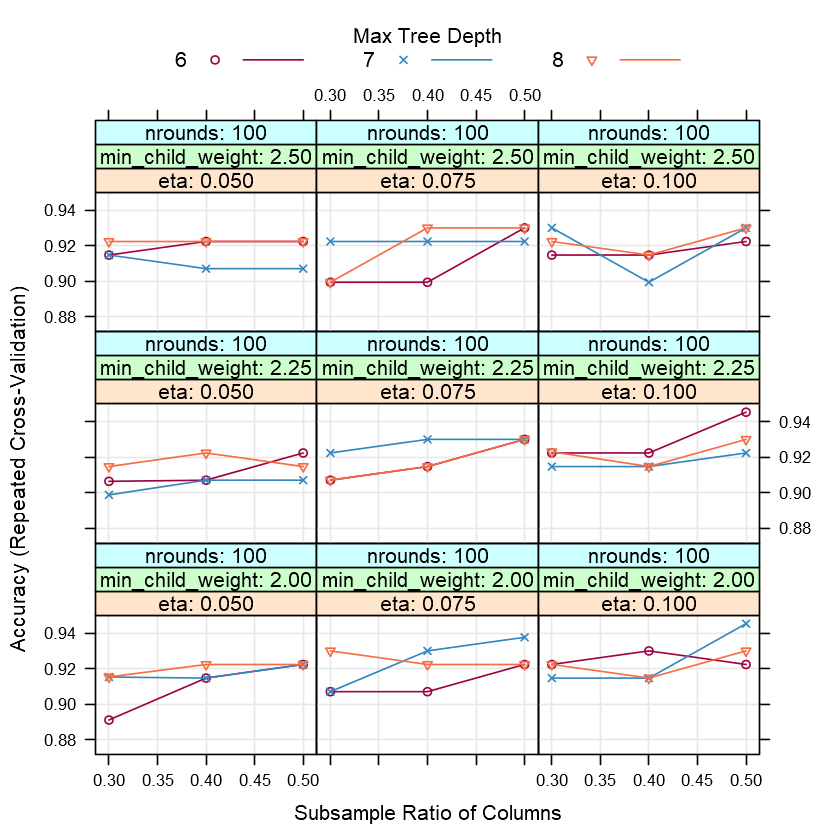

In [43]:
plot(xgbTree)

In [44]:
xgbTree_pred <- predict(xgbTree, datos_test_todo)
confusionMatrix(xgbTree_pred, datos_test_todo$CanalDistribucion)

Confusion Matrix and Statistics

                 Reference
Prediction        Horeca Canal Minorista
  Horeca              87               2
  Canal Minorista      2              40
                                          
               Accuracy : 0.9695          
                 95% CI : (0.9237, 0.9916)
    No Information Rate : 0.6794          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9299          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9775          
            Specificity : 0.9524          
         Pos Pred Value : 0.9775          
         Neg Pred Value : 0.9524          
             Prevalence : 0.6794          
         Detection Rate : 0.6641          
   Detection Prevalence : 0.6794          
      Balanced Accuracy : 0.9650          
                                          
       'Positive' Class : Horeca          


# Comparación por métricas de error entre metodologías 



A continuación se mostrará las métricas halladas en cada una de las metodologías gracias a la libreria caret y se hará umna breve comparación y análisis para determinar cual de estas fue la que mejor resultado arrojó

| Metodología\ Métrica| Accuracy | Kappa  | Sensitivity | Specificity |
|---------------|----------|--------|-------------|-------------|
| KNN           | 0.8855   | 0.7388 | 0.9205      | 0.8140     |
| C50           | 0.9398   | 0.8633 | 0.9326      | 0.9524      |
| Random Forest | 1        | 1      | 1           | 1           |
| XG Boost      | 0.9695   | 0.9299 | 0.9775      | 0.9524      |

### Comparación

#### Accuracy 
Esta métrica indica la conformidad de un valor medio con su valor verdadero, es decir, qué tan cerca está un valor medido del valor real (verdadero), en terminos de proporción es la proporción de aciertos en la predicción realizada. Y con respecto a la tabla resumen de arriba podemos notar que el modelo que con mejor métrica es el obtenido con  **Random Forest** con *accuracy*=1.

#### Kappa
Es una medida de concordancia más sólida que el simple cálculo de porcentaje de acuerdo, ya que κ tiene en cuenta la posibilidad de que el acuerdo se produzca por casualidad, es decir, ajusta el efecto del azar en la proporción de la concordancia observada.  
Respecto a los datos obtenidos que se evidencian en la tabla, notamos que el modelo ajustado por **Random Forest** tiene una concordancia perfecta, es decir *k*=1, por lo tanto este es el modelo con mejor ajuste.

#### Sensitivity
Esta métrica de error mide la proporción de ejemplos positivos que fueron correctamente clasificados, tambien es llamada tasa verdadera positiva. Y al ser comparadas todas estas metricas obtenidas por los modelos se puede concluir que nuevamente el modelo que mejor ajusta es el resultante de un **Random Forest** en el cual la medida es de *specificity*=1.

#### Specificity
Esta métrica de error mide la proporción de ejemplos negativos correctamente clasificados, tambien es llamada tasa verdadera negativa. Y al ser comparadas todas estas metricas obtenidas por los modelos se puede concluir que nuevamente el modelo que mejor ajusta es el resultante de un **Random Forest** en el cual la medida es de *specificity*=1.

### Por lo tanto, luego de analizar las métricas y realizar comparaciones el modelo seleccionado es el obtenido por RANDOM FOREST (bosques).